# 웹 스크래핑

- 브라우저의 주소창에 URL을 입력하고 이동하면, 브라우저(client)는 해당 URL에 요청(request)를  서버(server)에게 보내게 된다. 해당 요청에 대한 부분을 서버가 HTTP 프로토콜 형식으로 응답(response)해 해당 URL에 해당하는 자원을 반환해준다.
- 반환된 파일에 따라 사용자는 미디어 파일이나, 웹사이트등을 볼 수 있게 된다.
- 웹스크래핑의 경우 `.html`로 이루어진 response에서 본인이 필요한 정보만 필터링하여 저장하는 행위를 뜻한다. 



In [3]:
import webbrowser as wb

url = 'naver.com'

def get_page(keyword):
    wb.open(url + '?query=' + keyword)

In [4]:
get_page('네이버')

## URL Request 

In [192]:
import requests


def get(url):
    res = requests.get(url)
    return res.content

# get('https://naver.com')

### BeautifulSoup
# BeautifulSoup
html 소스코드로 부터 원하는 데이터를 추출해보자

Naver_crawler inited
<Response [200]>
<Response [200]>
에이피티씨의 현재 주가 차트


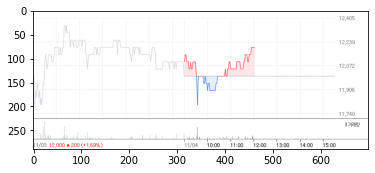

In [193]:
from bs4 import BeautifulSoup as bs
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


class Naver_crawler():
    parser = 'lxml'

    def __init__(self):
        print('Naver_crawler inited')

    def req(self, path = 'https://naver.com'):
        

        res = requests.get(path, headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'})
        print(res)

        html = res.text

        parsed = bs(html, self.parser)
        return parsed

    def get_main(self):
        return self.req()
    
    def get_menu(self):
        html = self.get_main()
        list = html.select('.list_nav.type_fix .nav_item a')
        data = [l.text for l in list]
        return data

    def search_stock(self, num):
        url = f'https://finance.naver.com/item/main.nhn?code={num}'
        html = self.req(url)
        title = html.select('.h_company h2 a')[0]
        name = title.text
        img = html.select('#img_chart_area')[0]
        imgurl = img.attrs['src']
        return (name, imgurl)

crawler = Naver_crawler()

# 메뉴 가져오기
crawler.get_menu()

# 메뉴 가져오기
name, imgurl = crawler.search_stock('089970')
print(f'{name}의 현재 주가 차트')
img = mpimg.imread(imgurl)
imgplot = plt.imshow(img)
plt.show()


In [184]:
url = 'https://www.hankookilbo.com/News/Read/A2020101618490003127'

def get_news_post():
    res = requests.get(url).text
    html = bs(res, 'lxml')
    # print(html)
    print(html.find_all(class_=['.title', '.editor-p']))
    # for tag in html.select('.editor-p'):
    #     print(tag.text)
    # print(data)

get_news_post()

[]


In [196]:
def req(url):
    res = requests.get(url, headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}).text
    html = bs(res, 'lxml')
    return html

In [186]:
alexa_ranking = req('https://www.alexa.com/topsites/countries/KR')

print('대한민국 웹사이트 상위 50위 m,.n ')
for i, v in  enumerate([a.get_text() for a in alexa_ranking.select('.DescriptionCell a')]):
    print(f'{i + 1}위 {v}')

대한민국 웹사이트 상위 50위 m,.n 
1위 Google.com
2위 Naver.com
3위 Youtube.com
4위 Daum.net
5위 Tistory.com
6위 Tmall.com
7위 Facebook.com
8위 Google.co.kr
9위 Kakao.com
10위 Amazon.com
11위 Namu.wiki
12위 Wikipedia.org
13위 Sohu.com
14위 Qq.com
15위 Netflix.com
16위 Taobao.com
17위 360.cn
18위 Jd.com
19위 Coupang.com
20위 Dcinside.com
21위 Apple.com
22위 Baidu.com
23위 Microsoft.com
24위 Twitch.tv
25위 Gmarket.co.kr
26위 Donga.com
27위 Adobe.com
28위 Yahoo.com
29위 Instagram.com
30위 Sina.com.cn
31위 Weibo.com
32위 Zoom.us
33위 Nate.com
34위 Stackoverflow.com
35위 11st.co.kr
36위 Office.com
37위 Amazon.co.uk
38위 Bing.com
39위 Ebay.com
40위 Aliexpress.com
41위 Yna.co.kr
42위 Chosun.com
43위 Afreecatv.com
44위 Fmkorea.com
45위 Ppomppu.co.kr
46위 Amazon.co.jp
47위 Inven.co.kr
48위 Dropbox.com
49위 Ruliweb.com
50위 Tumblr.com


In [187]:
import pandas as pd

def get_text_by_select(html, selector):
    data = [[index + 1, i.get_text()] for index, i in enumerate(html.select(selector)[:])]
    return data



naver_music_top50 = req('https://music.naver.com/listen/top100.nhn?domain=TOTAL')

ranking = get_text_by_select(naver_music_top50, '.title span')

df = pd.DataFrame(ranking, columns=['순위', '곡명'])

sheet_name='2020년 11월 03일 네이버뮤직 Top 50'


excelWriter = pd.ExcelWriter(sheet_name+'.xlsx', engine='xlsxwriter')
# worksheet = excelWriter.sheets[sheet_name]
df.to_excel(excelWriter, index=True, sheet_name=sheet_name)
excelWriter.save()

In [188]:
naver_tv_top100 = req('https://tv.naver.com/r/')

def get_text_by_select(html, selector):
    data = [i.get_text() for index, i in enumerate(html.select(selector)[:])]
    return data

chanels = get_text_by_select(naver_tv_top100, '.chn a')
hits = [t[5:] for t in get_text_by_select(naver_tv_top100, '.meta .hit')]
titles = get_text_by_select(naver_tv_top100, 'dt.title span, dt.title tooltip')

df2 = pd.DataFrame(list(zip(titles, chanels, hits)), columns=['제목', '채널', '조회수'])
df2


,제목,채널,조회수
0,"[긴박엔딩] 이지아, 김소연×엄기준 불륜 현장 목격 후 들키기 ‘일보 직전!’",펜트하우스,"90,297"
1,17살 차이나는 박휘순♥천예지 부부!! 나이보단 사랑이 우선이다..☆,아내의 맛,"21,225"
2,임신 확률 겨우 4%😭 둘째 원하는 이유!?,아내의 맛,"16,518"
3,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,아무도 모르게 김호중의 파트너,"02,515"
4,[키스 엔딩] ＂보고 싶었어...＂ 김하늘♥이도현의 변하지 않은 사랑,18 어게인,"10,810"
...,...,...,...
95,김희재 ‘나는 남자다’ ♫ 섹시한 골반댄스♨,2020 트롯 어워즈,"13,020"
96,[단독] 술 취해 지하철서 여성 성추행…말리는 시민 폭행까지,MBN 뉴스,",474"
97,현대건설-흥국생명 풀영상,프로배구 네이버스포츠,",217"
98,"[티저] ＂나도 아닌데, 장난치는 거＂ 〈라이브 온〉 11/17(화) 첫 방송!",라이브온,"45,127"


In [189]:
"""
네이버 뮤직 2017년 12월 1주차 1~100위 엑셀로 추출하기
"""

def get_text_by_select(html, selector):
    data = [i.get_text().strip() for index, i in enumerate(html.select(selector)[:])]
    return data

def get_naver_music_top100_excel(year, month):
    year = str(year)
    month = str(month)
    if len(month) == 1:
        month = '0' + month

    url = f"https://music.naver.com/listen/history/index.nhn?type=TOTAL&year={year}&month={month}&week=0&page="

    data = []

    for i in list(range(0, 2)):
        old_naver_music_top100 = req(url + str(i))
        titles = get_text_by_select(old_naver_music_top100, '.title span')[1:]
        artists = get_text_by_select(old_naver_music_top100, '.artist a')
        
        for j, value in enumerate(titles):
            row = [50*i + j + 1, titles[j], artists[j]]
            data.append(row)

    table = pd.DataFrame(data, columns=['순위', '곡명', '가수'])
    # table.to_excel(f'{year}년{month}_top100.xlsx')
    print(table)

get_naver_music_top100_excel('2017', '12')


     순위                 곡명               가수
0     1                 선물  멜로망스(Melomance)
1     2      눈 (Feat. 이문세)           Zion.T
2     3            기억의 빈자리               나얼
3     4       Heart Shaker      TWICE(트와이스)
4     5          Beautiful   Wanna One(워너원)
..  ...                ...              ...
95   96  Lonely (Feat. 태연)    종현 (JONGHYUN)
96   97              슬픈 노래             젝스키스
97   98             네가 필요해             젝스키스
98   99             밤이 되니까       펀치 (Punch)
99  100           나의 사춘기에게           볼빨간사춘기

[100 rows x 3 columns]


In [202]:
"""
멜론 1~100위 엑셀로 추출하기
"""

def get_text_by_select(html, selector):
    data = [i.get_text().strip() for index, i in enumerate(html.select(selector)[:])]
    return data

def get_melon_top100_excel():

    url = f"https://www.melon.com/new/index.htm#params%5BareaFlg%5D=I&po=pageObj&startIndex=1"

    data = []

    melon_top100 = req(url + str(i))
    
    titles = get_text_by_select(melon_top100, '.rank01')
    artists = get_text_by_select(melon_top100, '.rank02')
    albums = get_text_by_select(melon_top100, '.rank03')
    
    for j, value in enumerate(titles):
        row = [j + 1, titles[j], artists[j], albums[j]]
           data.append(row)

    table = pd.DataFrame(data, columns=['순위', '곡명', '가수', '앨범'])
    # table.to_excel(f'{year}년{month}_top100.xlsx')
    return table

data = get_melon_top100_excel()
data


IndentationError: unexpected indent (<ipython-input-202-8a1e815759ce>, line 23)

In [217]:
from urllib import parse
"""
    네이버 뉴스 중요 뉴스만 가져오기
"""

def get_news():
    # keyword = parse.urlencode(keyword)
    html = req(f"https://news.naver.com/")
    component = get_text_by_select(html, '.main_component')

    for i in component:
        print(i)

    return html

get_news('심으뜸')

TypeError: get_news() takes 0 positional arguments but 1 was given